Optimization via Gradient Descent

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
def GD(f, grad_f, x0, kmax, tolf, tolx, alpha):
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.linalg.norm(grad_f(x0), 2)]
    k = 0
    condition = True
    
    while condition:
        
        x.append(x[k] - alpha * grad_f(x[k]))
        f_val.append(f(x[k+1]))
        grads.append(grad_f(x[k+1]))
        err.append(np.linalg.norm(grad_f(x[k+1]), 2))
        
        condition1 = (np.linalg.norm(grad_f(x[k+1]), 2) > tolf * np.linalg.norm(grad_f(x[0]), 2))
        condition2 = (np.linalg.norm(x[k+1] - x[k], 2) > tolx)
        condition3 = k < kmax
        
        condition = condition1 and condition2 and condition3
        
        k += 1
        
    x = np.asarray(x)
    f_val = np.asarray(f_val)
    grads = np.asarray(grads)
    err = np.asarray(err)
    
    return x, k, f_val, grads, err

In [14]:
# ADD THE BACKTRACKING FUNCTION AND USE IT IN GRADIENT DESCENT

def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            print('alpha too small')
            break
    return alpha

def GD_bt(f, grad_f, x0, kmax, tolf, tolx):
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.linalg.norm(grad_f(x0), 2)]
    k = 0
    condition = True
    
    while condition:
        
        alpha = backtracking(f, grad_f, x[k])
        
        x.append(x[k] - alpha * grad_f(x[k]))
        f_val.append(f(x[k+1]))
        grads.append(grad_f(x[k+1]))
        err.append(np.linalg.norm(grad_f(x[k+1]), 2))
        
        condition1 = (np.linalg.norm(grad_f(x[k+1]), 2) > tolf * np.linalg.norm(grad_f(x[0]), 2))
        condition2 = (np.linalg.norm(x[k+1] - x[k], 2) > tolx)
        condition3 = k < kmax
        
        condition = condition1 and condition2 and condition3
        
        k += 1
        
    x = np.asarray(x)
    f_val = np.asarray(f_val)
    grads = np.asarray(grads)
    err = np.asarray(err)
    
    return x, k, f_val, grads, err

In [15]:
def statistics_and_graphs(x_sol0, iterations0, x_sol1, iterations1, x_true, x_sol_bt, iterations_bt, err0, err1, err_bt):
    print('alpha = 0.01')
    print('Point reached:', x_sol0[-1], 'with', iterations0, 'iterations.')
    print('Error from the true point:', np.linalg.norm(x_true - x_sol0[-1]))
    print('\n')
    print('alpha = 0.1')
    print('Point reached:', x_sol1[-1], 'with', iterations1, 'iterations.')
    print('Error from the true point:', np.linalg.norm(x_true - x_sol1[-1]))
    print('\n')
    print('bt')
    print('Point reached with backtracking:', x_sol_bt[-1], 'with', iterations_bt, 'iterations.')
    print('Error from the true point:', np.linalg.norm(x_true - x_sol_bt[-1]))
    
    plt.plot(err0, 'k--')
    plt.plot(err1, 'b--')
    plt.plot(err_bt, 'r--')
    plt.legend(['err alpha 0.01', 'err alpha 0.1', 'err_bt'])
    plt.title('Convergence speed')
    plt.grid()
    plt.show()
    
def contour_generator(f, x1, x2, xt1, xt2, s):
    x = np.linspace(-1, 4, 100)
    y = np.linspace(-1, 4, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.array([X, Y]))
    contour = plt.contour(X, Y, Z, levels=50)
    plt.clabel(contour, inline=1, fontsize=10)
    plt.plot(x1, x2, 'rx--')

    plt.title('Contour plot with path ' + s)
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.scatter(xt1, xt2, color='blue', marker='o')

    plt.show()

alpha = 0.01
Point reached: [2.61009851 0.87003284] with 101 iterations.
Error from the true point: 0.410992261729281


alpha = 0.1
Point reached: [2.99996575 0.99998858] with 51 iterations.
Error from the true point: 3.610682795362177e-05


bt
Point reached with backtracking: [2.99993978 0.99997993] with 81 iterations.
Error from the true point: 6.348224762644723e-05


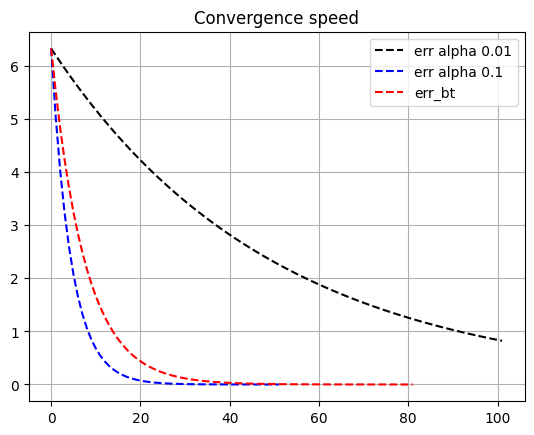

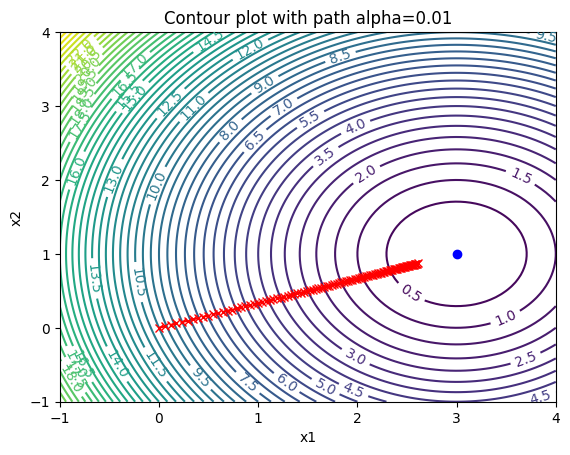

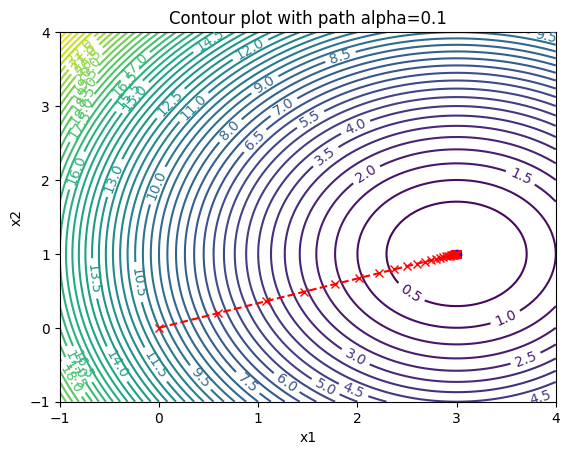

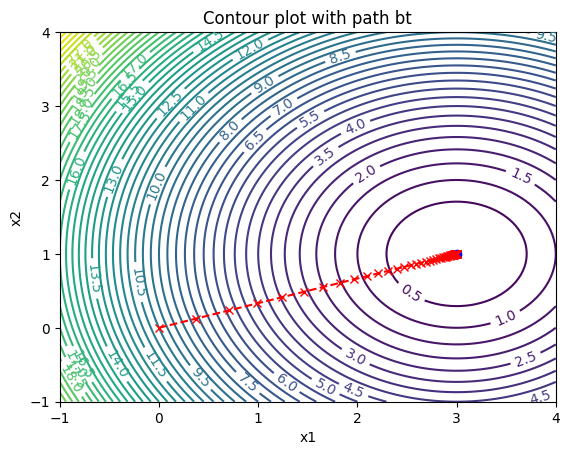

In [16]:
# FUNCTION 1
def f1(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f1(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*x1 - 6, 2*x2 - 2])

x_true1 = np.array([3, 1])

x0 = np.array([0, 0])
kmax = 100
tolf = 1e-5
tolx = 1e-5
alphas = [0.01, 0.1]


x_sol10, iterations10, f_val10, grads10, err10 = GD(f1, grad_f1, x0, kmax, tolf, tolx, alphas[0])
x_sol11, iterations11, f_val11, grads11, err11 = GD(f1, grad_f1, x0, kmax, tolf, tolx, alphas[1])
x_sol1_bt, iterations1_bt, f_val1_bt, grads1_bt, err1_bt = GD_bt(f1, grad_f1, x0, kmax, tolf, tolx)

statistics_and_graphs(x_sol10, iterations10, x_sol11, iterations11, x_true1, x_sol1_bt, iterations1_bt, err10, err11, err1_bt)

contour_generator(f1, x_sol10[:, 0], x_sol10[:, 1], x_true1[0], x_true1[1], 'alpha=0.01')
contour_generator(f1, x_sol11[:, 0], x_sol11[:, 1], x_true1[0], x_true1[1], 'alpha=0.1')
contour_generator(f1, x_sol1_bt[:, 0], x_sol1_bt[:, 1], x_true1[0], x_true1[1], 'bt')

alpha = 0.01
Point reached: [1.         1.74006567] with 101 iterations.
Error from the true point: 0.259934329553716


alpha = 0.1
Point reached: [2. 2.] with 101 iterations.
Error from the true point: 1.0


bt
Point reached with backtracking: [1.         1.99990644] with 80 iterations.
Error from the true point: 9.356208145394618e-05


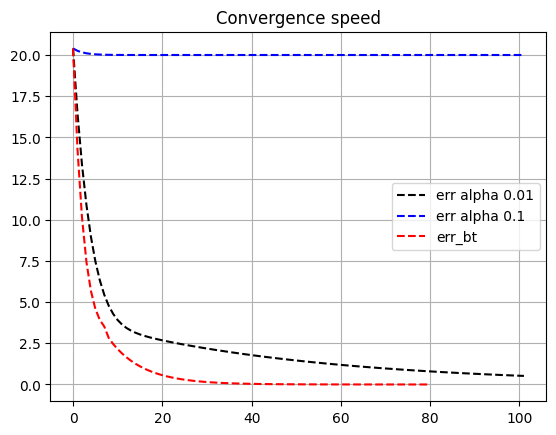

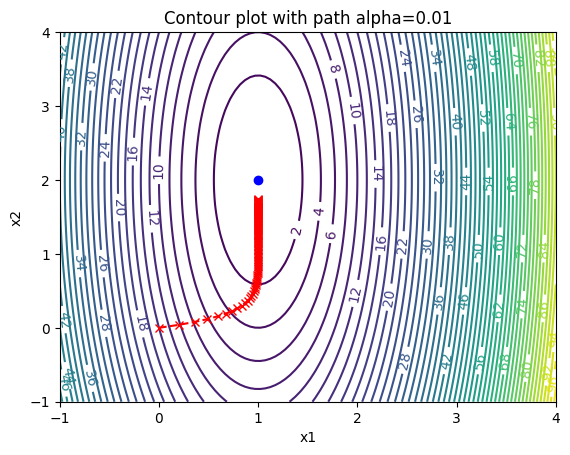

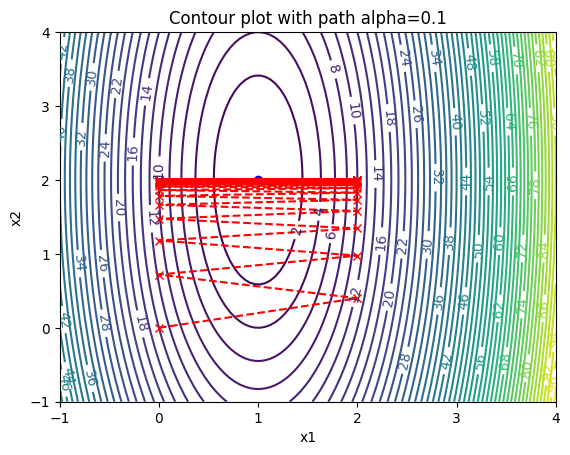

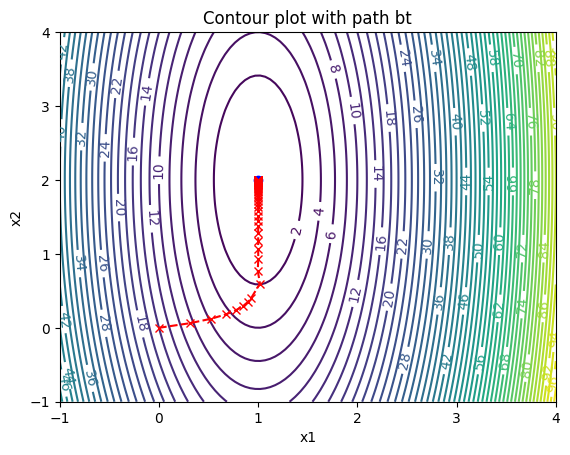

In [17]:
# FUNCTION 2
def f2(x):
    x1 = x[0]
    x2 = x[1]
    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_f2(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*x1 - 20, 2*x2 - 4])

x_true2 = np.array([1, 2])

x0 = np.array([0, 0])
kmax = 100
tolf = 1e-5
tolx = 1e-5
alphas = [0.01, 0.1]

x_sol20, iterations20, f_val20, grads20, err20 = GD(f2, grad_f2, x0, kmax, tolf, tolx, alphas[0])
x_sol21, iterations21, f_val21, grads21, err21 = GD(f2, grad_f2, x0, kmax, tolf, tolx, alphas[1])
x_sol2_bt, iterations2_bt, f_val2_bt, grads2_bt, err2_bt = GD_bt(f2, grad_f2, x0, kmax, tolf, tolx)

statistics_and_graphs(x_sol20, iterations20, x_sol21, iterations21, x_true2, x_sol2_bt, iterations2_bt, err20, err21, err2_bt)
    
contour_generator(f2, x_sol20[:, 0], x_sol20[:, 1], x_true2[0], x_true2[1], 'alpha=0.01')
contour_generator(f2, x_sol21[:, 0], x_sol21[:, 1], x_true2[0], x_true2[1], 'alpha=0.1')
contour_generator(f2, x_sol2_bt[:, 0], x_sol2_bt[:, 1], x_true2[0], x_true2[1], 'bt')

----------------------------------------------------------------------------
n =  1
alpha = 0.01
Point reached: [0.63762798] with 101 iterations.
Error from the true point: 0.3623720178604969


alpha = 0.1
Point reached: [0.99991536] with 89 iterations.
Error from the true point: 8.46414978287191e-05


bt
Point reached with backtracking: [0.99997616] with 37 iterations.
Error from the true point: 2.3837831494288864e-05


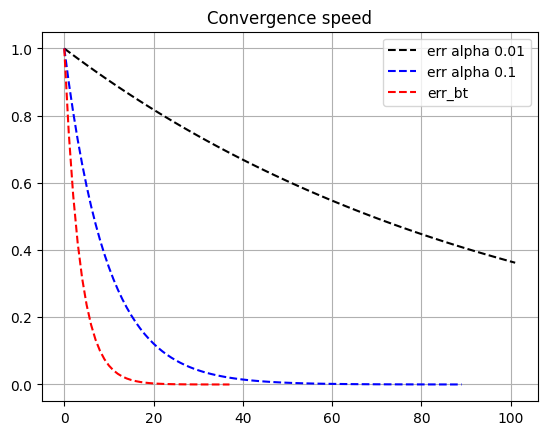

----------------------------------------------------------------------------
n =  5
alpha = 0.01
Point reached: [0.87599673 0.91430429 0.96810777 1.04385715 1.0818782 ] with 101 iterations.
Error from the true point: 0.1799032262793395


alpha = 0.1
Point reached: [0.97267007 0.9914064  1.01220753 1.02701094 0.9919947 ] with 101 iterations.
Error from the true point: 0.04199374115569478


bt
Point reached with backtracking: [0.98262623 0.99646586 1.00977362 1.01289291 0.99581423] with 101 iterations.
Error from the true point: 0.024364104060628763


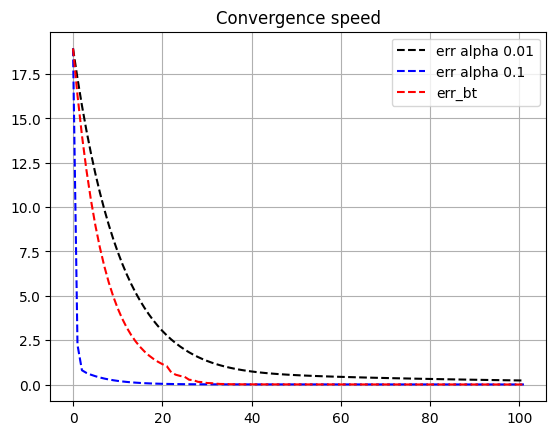

----------------------------------------------------------------------------
n =  10
alpha = 0.01
Point reached: [0.91495921 0.93125214 0.94986108 0.97103644 0.99490879 1.02123248
 1.04866849 1.0725215  1.07607264 0.95690303] with 101 iterations.
Error from the true point: 0.17623883362776835


alpha = 0.1
Point reached: [22.57394312 23.46141353 24.55641102 25.93405734 27.71245487 30.09054876
 33.43705714 38.53884523 47.48660549 71.42098608] with 101 iterations.
Error from the true point: 115.27282617298616


bt
Point reached with backtracking: [0.98313968 0.99009363 0.99716014 1.00393304 1.00968715 1.0131498
 1.01213224 1.00314768 0.98280901 1.00289168] with 101 iterations.
Error from the true point: 0.033670297370112824


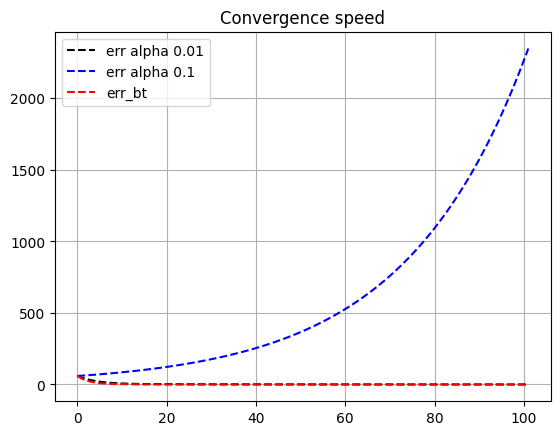

----------------------------------------------------------------------------
n =  15
alpha = 0.01
Point reached: [0.92839035 0.93786743 0.94809898 0.95911493 0.97092515 0.98350329
 0.9967588  1.01048819 1.0242867  1.03738312 1.04831503 1.05425461
 1.04952377 1.02227469 0.96028957] with 101 iterations.
Error from the true point: 0.1624273049307706


alpha = 0.1
Point reached: [6.67253307e+34 6.85088287e+34 7.05500375e+34 7.29039665e+34
 7.56429038e+34 7.88640431e+34 8.27016790e+34 8.73476046e+34
 9.30871784e+34 1.00367675e+35 1.09939979e+35 1.23190173e+35
 1.43062795e+35 1.77405169e+35 2.64805314e+35] with 101 iterations.
Error from the true point: 4.625056813095034e+35


bt
Point reached with backtracking: [0.97480612 0.98049555 0.98638309 0.99239644 0.9984225  1.00428828
 1.00973255 1.01436314 1.01759324 1.01854911 1.01595204 1.00804651
 0.99304798 0.97320945 1.00672803] with 101 iterations.
Error from the true point: 0.058003671197880816


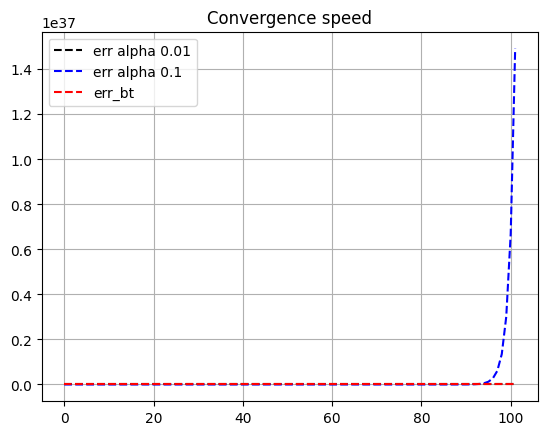

----------------------------------------------------------------------------
n =  20
alpha = 0.01
Point reached: [0.94115099 0.94760845 0.95440217 0.96153363 0.96899728 0.97677728
 0.98484278 0.99314115 1.00158797 1.01005217 1.01833348 1.02612777
 1.0329728  1.03816159 1.04060312 1.03860085 1.02953874 1.00972829
 0.97708058 0.98626719] with 101 iterations.
Error from the true point: 0.14152637865568654


alpha = 0.1
Point reached: [7.58148603e+53 7.73244383e+53 7.89914100e+53 8.08395587e+53
 8.28978170e+53 8.52017863e+53 8.77958413e+53 9.07361079e+53
 9.40947786e+53 9.79665411e+53 1.02478464e+54 1.07805792e+54
 1.14198337e+54 1.22027123e+54 1.31872703e+54 1.44708149e+54
 1.62326983e+54 1.88534106e+54 2.33485156e+54 3.45444450e+54] with 101 iterations.
Error from the true point: 6.30201919762564e+54


bt
Point reached with backtracking: [0.97372045 0.97795088 0.9822969  0.98673428 0.99122895 0.99573382
 1.00018471 1.00449472 1.00854687 1.01218425 1.01519701 1.01730573
 1.01814121 1.0172

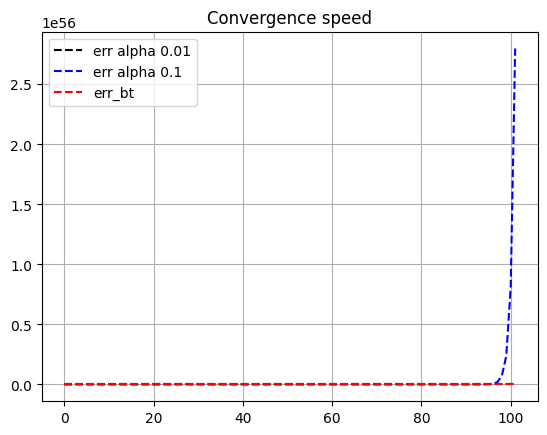

In [27]:
# FUNCTION 3
def f3(x):
    x = np.array(x).T
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n,)).T
    b = A @ x_true
    return 0.5 * (np.linalg.norm(A @ x - b)**2)

def grad_f3(x):
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n,)).T
    b = A @ x_true
    return A.T @ (A @ x - b)

for n in [1, 5, 10, 15, 20]:

    print('----------------------------------------------------------------------------')
    print('n = ', n)
    
    x_true3 = np.ones((n,))

    x0 = np.zeros((n,))
    kmax = 100
    tolf = 1e-5
    tolx = 1e-5
    alphas = [0.01, 0.1]

    x_sol30, iterations30, f_val30, grads30, err30 = GD(f3, grad_f3, x0, kmax, tolf, tolx, alphas[0])
    x_sol31, iterations31, f_val31, grads31, err31 = GD(f3, grad_f3, x0, kmax, tolf, tolx, alphas[1])
    x_sol3_bt, iterations3_bt, f_val3_bt, grads3_bt, err3_bt = GD_bt(f3, grad_f3, x0, kmax, tolf, tolx)

    statistics_and_graphs(x_sol30, iterations30, x_sol31, iterations31, x_true3, x_sol3_bt, iterations3_bt, err30, err31, err3_bt)


lambdas =  0.8174890786940562


----------------------------------------------------------------------------
n =  1
alpha = 0.01
Point reached: [0.46391659] with 101 iterations.
Error from the true point: 0.536083408787513


alpha = 0.1
Point reached: [0.55016535] with 47 iterations.
Error from the true point: 0.4498346454624156


bt
Point reached with backtracking: [0.55013629] with 74 iterations.
Error from the true point: 0.4498637131784251


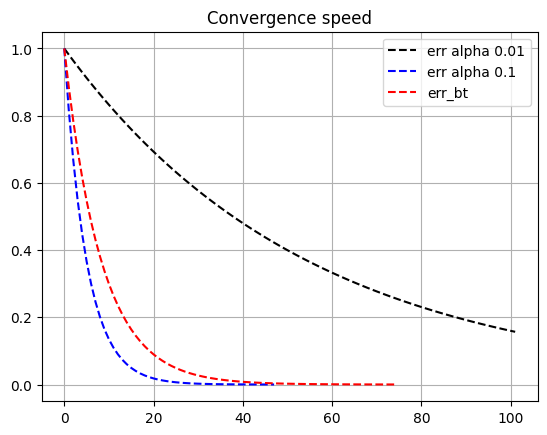

----------------------------------------------------------------------------
n =  5
alpha = 0.01
Point reached: [0.76147404 0.79945056 0.85492962 0.93953887 1.05417723] with 101 iterations.
Error from the true point: 0.3532008555506682


alpha = 0.1
Point reached: [0.78194427 0.8176967  0.86895324 0.94442068 1.0263897 ] with 43 iterations.
Error from the true point: 0.31896947709804985


bt
Point reached with backtracking: [0.78194092 0.81769527 0.86895474 0.94442673 1.02638712] with 69 iterations.
Error from the true point: 0.318970693879787


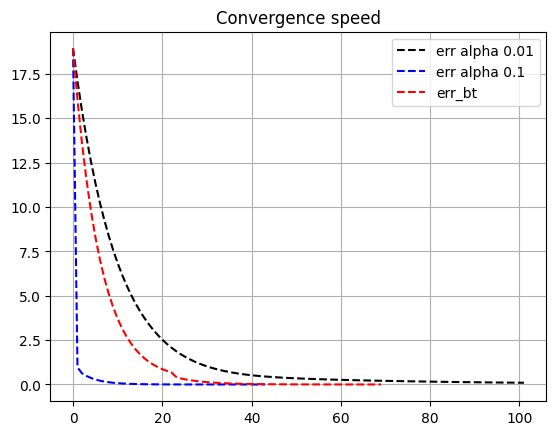

----------------------------------------------------------------------------
n =  10
alpha = 0.01
Point reached: [0.83369548 0.85074465 0.87053184 0.89354501 0.92031615 0.95131472
 0.98657041 1.02429214 1.05498266 1.00320987] with 101 iterations.
Error from the true point: 0.3009196778337079


alpha = 0.1
Point reached: [ 44180.04502464  45981.0352192   48206.33154335  51010.47823892
  54636.64141424  59494.583307    66343.46581714  76801.04843178
  95153.50127393 144083.43640878] with 101 iterations.
Error from the true point: 235859.13057355216


bt
Point reached with backtracking: [0.84467609 0.86044127 0.87860927 0.89955238 0.92363952 0.95111557
 0.98173692 1.013592   1.03862917 1.00946397] with 41 iterations.
Error from the true point: 0.2806212029953688


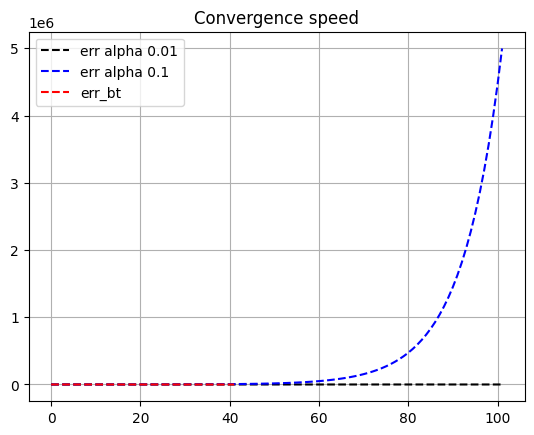

----------------------------------------------------------------------------
n =  15
alpha = 0.01
Point reached: [0.86321701 0.87366267 0.88508383 0.89757142 0.911217   0.92610513
 0.94229853 0.95980925 0.97854184 0.99817779 1.01792828 1.03596415
 1.04795161 1.04261678 0.98352956] with 101 iterations.
Error from the true point: 0.28830733098039935


alpha = 0.1
Point reached: [2.48113390e+36 2.54745200e+36 2.62335290e+36 2.71088208e+36
 2.81272751e+36 2.93250328e+36 3.07520303e+36 3.24795847e+36
 3.46138044e+36 3.73210051e+36 4.08803981e+36 4.58073886e+36
 5.31968813e+36 6.59668485e+36 9.84659700e+36] with 101 iterations.
Error from the true point: 1.719794437454322e+37


bt
Point reached with backtracking: [0.87360957 0.88331694 0.89388184 0.90537075 0.91784465 0.93134974
 0.94590073 0.96145034 0.97783247 0.99465297 1.01107039 1.02533004
 1.03370633 1.0279702  0.99568654] with 80 iterations.
Error from the true point: 0.262491161766234


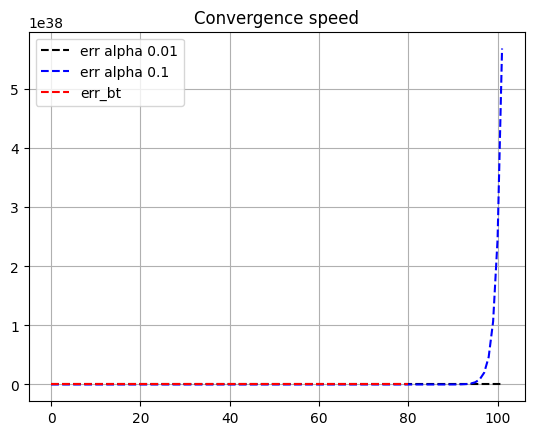

In [37]:
# FUCTION 4
lam = random.random()
print('lambdas = ', lam)
print('\n')

def f4(x):
    x = np.array(x).T
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n,)).T
    b = A @ x_true
    return (0.5 * (np.linalg.norm(A @ x - b)**2)) + (lam / 2) * (np.linalg.norm(x)**2)

def grad_f4(x):
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n,)).T
    b = A @ x_true
    return A.T @ (A @ x - b) + lam * np.array(x)

for n in [1, 5, 10, 15]:

    print('----------------------------------------------------------------------------')
    print('n = ', n)
    
    x_true4 = np.ones((n,))

    x0 = np.zeros((n,))
    kmax = 100
    tolf = 1e-5
    tolx = 1e-5
    alphas = [0.01, 0.1]

    x_sol40, iterations40, f_val40, grads40, err40 = GD(f4, grad_f4, x0, kmax, tolf, tolx, alphas[0])
    x_sol41, iterations41, f_val41, grads41, err41 = GD(f4, grad_f4, x0, kmax, tolf, tolx, alphas[1])
    x_sol4_bt, iterations4_bt, f_val4_bt, grads4_bt, err4_bt = GD_bt(f4, grad_f4, x0, kmax, tolf, tolx)

    statistics_and_graphs(x_sol40, iterations40, x_sol41, iterations41, x_true4, x_sol4_bt, iterations4_bt, err40, err41, err4_bt)

In [20]:
def GD_abs(f, grad_f, x0, kmax, tolf, tolx, alpha):
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.abs(grad_f(x0))]
    k = 0
    condition = True
    
    while condition:
        
        x.append(x[k] - alpha * grad_f(x[k]))
        f_val.append(f(x[k+1]))
        grads.append(grad_f(x[k+1]))
        err.append(np.abs(grad_f(x[k+1])))
        
        condition1 = (np.abs(grad_f(x[k+1])) > tolf * np.abs(grad_f(x[0])))
        condition2 = (np.abs(x[k+1] - x[k]) > tolx)
        condition3 = k < kmax
        
        condition = condition1 and condition2 and condition3
        
        k += 1
        
    x = np.asarray(x)
    f_val = np.asarray(f_val)
    grads = np.asarray(grads)
    err = np.asarray(err)
    
    return x, k, f_val, grads, err


def backtracking_abs(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.abs(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            print('alpha too small')
            break
    return alpha

def GD_bt_abs(f, grad_f, x0, kmax, tolf, tolx):
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.abs(grad_f(x0))]
    k = 0
    condition = True
    
    while condition:
        
        alpha = backtracking(f, grad_f, x[k])
        
        x.append(x[k] - alpha * grad_f(x[k]))
        f_val.append(f(x[k+1]))
        grads.append(grad_f(x[k+1]))
        err.append(np.abs(grad_f(x[k+1])))
        
        condition1 = (np.abs(grad_f(x[k+1])) > tolf * np.abs(grad_f(x[0])))
        condition2 = (np.abs(x[k+1] - x[k]) > tolx)
        condition3 = k < kmax
        
        condition = condition1 and condition2 and condition3
        
        k += 1
        
    x = np.asarray(x)
    f_val = np.asarray(f_val)
    grads = np.asarray(grads)
    err = np.asarray(err)
    
    return x, k, f_val, grads, err

----------------------------------------------------------------------------
x0 = 0


alpha = 0.01
Point reached: 0.9221561972760987 with 95 iterations.


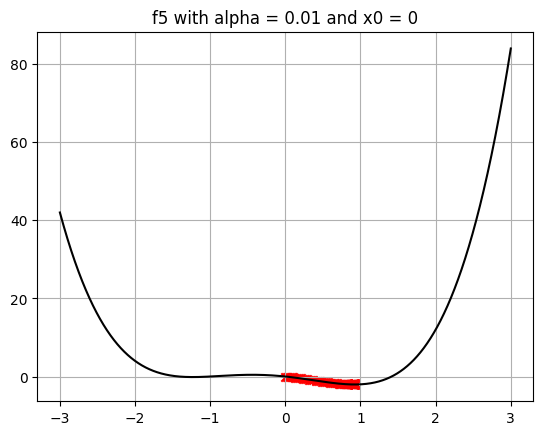



alpha = 0.1
Point reached: 0.9222263966908124 with 9 iterations.


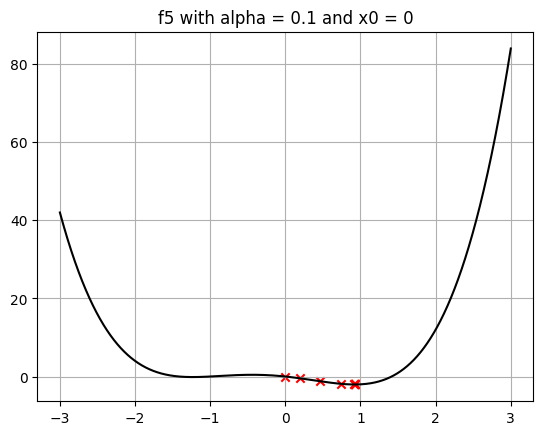



bt
Point reached with backtracking: 0.9221833168070763 with 47 iterations.


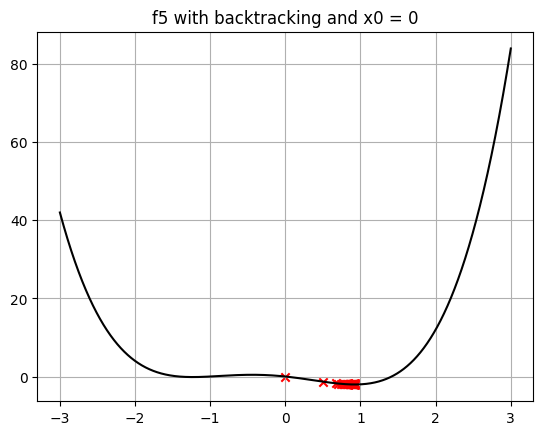

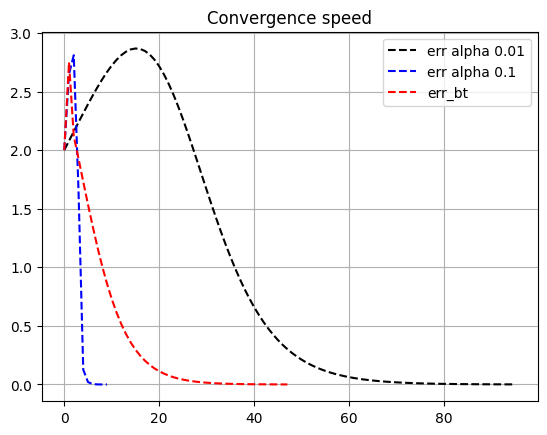

----------------------------------------------------------------------------
x0 = -2.5


alpha = 0.01
Point reached: -1.2325005082098366 with 101 iterations.


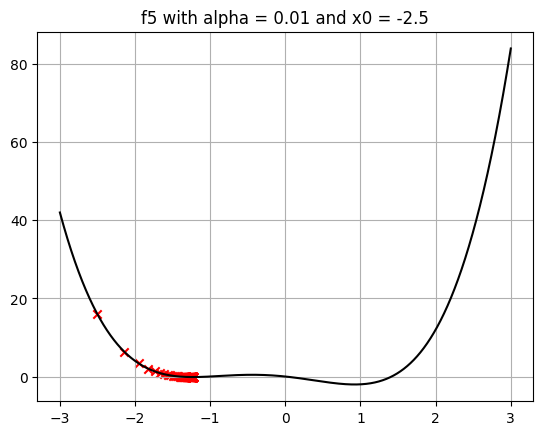



alpha = 0.1
Point reached: 0.9221949613697291 with 6 iterations.


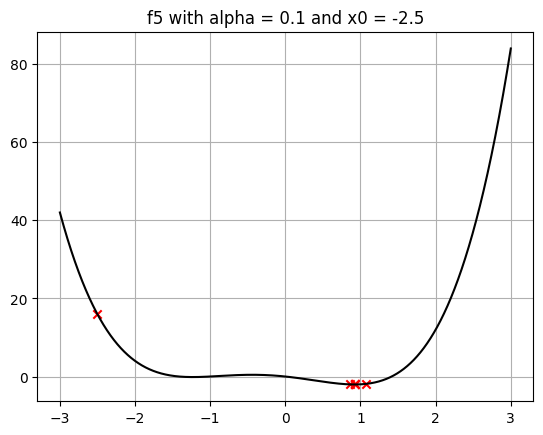



bt
Point reached with backtracking: -1.232317529099756 with 80 iterations.


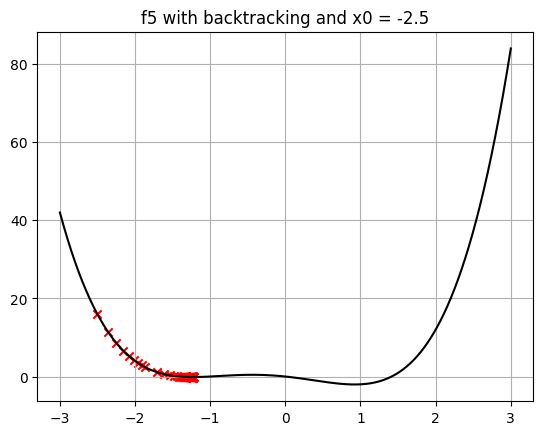

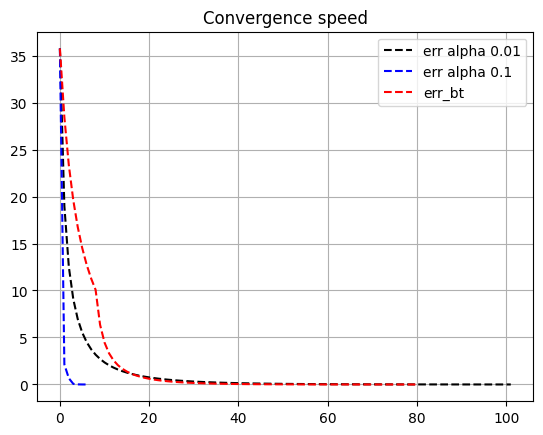

In [43]:
# FUNCTION 5

def f5(x):
    return x**4 + x**3 - 2*(x**2) - 2*x

def grad_f5(x):
    return 4*(x**3) + 3*(x**2) - 4*x - 2

kmax = 100
tolf = 1e-5
tolx = 1e-5
alphas = [0.01, 0.1]

for i in [0, -2.5]:
    x0 = i

    x_sol50, iterations50, f_val50, grads50, err50 = GD_abs(f5, grad_f5, x0, kmax, tolf, tolx, alphas[0])
    x_sol51, iterations51, f_val51, grads51, err51 = GD_abs(f5, grad_f5, x0, kmax, tolf, tolx, alphas[1])
    x_sol5_bt, iterations5_bt, f_val5_bt, grads5_bt, err5_bt = GD_bt_abs(f5, grad_f5, x0, kmax, tolf, tolx)

    x = np.linspace(-3, 3, 100000)

    print('----------------------------------------------------------------------------')
    print('x0 =', x0)
    print('\n')
    
    print('alpha = 0.01')
    print('Point reached:', x_sol50[-1], 'with', iterations50, 'iterations.')
    plt.plot(x, x**4 + x**3 - 2*(x**2) - 2*x, 'k-')
    plt.scatter(x_sol50, f_val50, c='red', marker='x')
    plt.title(f'f5 with alpha = 0.01 and x0 = {x0}')
    plt.grid()
    plt.show()

    print('\n')

    print('alpha = 0.1')
    print('Point reached:', x_sol51[-1], 'with', iterations51, 'iterations.')
    plt.plot(x, x**4 + x**3 - 2*(x**2) - 2*x, 'k-')
    plt.scatter(x_sol51, f_val51, c='red', marker='x')
    plt.title(f'f5 with alpha = 0.1 and x0 = {x0}')
    plt.grid()
    plt.show()

    print('\n')

    print('bt')
    print('Point reached with backtracking:', x_sol5_bt[-1], 'with', iterations5_bt, 'iterations.')
    plt.plot(x, x**4 + x**3 - 2*(x**2) - 2*x, 'k-')
    plt.scatter(x_sol5_bt, f_val5_bt, c='red', marker='x')
    plt.title(f'f5 with backtracking and x0 = {x0}')
    plt.grid()
    plt.show()

    plt.plot(err50, 'k--')
    plt.plot(err51, 'b--')
    plt.plot(err5_bt, 'r--')
    plt.legend(['err alpha 0.01', 'err alpha 0.1', 'err_bt'])
    plt.title('Convergence speed')
    plt.grid()
    plt.show()